In [1013]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lin

In [1014]:
oil = pd.DataFrame.from_csv('CrudeOilPrices.csv')

In [1015]:
fed = pd.DataFrame.from_csv('FederalFundsRate.csv')

In [1016]:
tre = pd.DataFrame.from_csv('TreasuryConstantMaturityRate.csv')
loa = pd.DataFrame.from_csv('LoanRate.csv')
spr = pd.DataFrame.from_csv('MerrillAdjustedSpread.csv')

In [1017]:
intermediate = pd.merge(oil, fed, left_index=True, right_index=True)
intermediate2 = pd.merge(tre, loa, left_index=True, right_index=True)

In [1018]:
intermediate3 = pd.merge(intermediate, intermediate2, left_index=True, right_index=True)

In [1019]:
data = pd.merge(intermediate3, spr, left_index=True, right_index=True)

In [1020]:
data.rename(columns = {'DCOILWTICO':'oil', 'DFF':'fed', 'DGS10':'tre', 'DPRIME':'loa', 'BAMLC0A4CBBB': 'spr'}, inplace=True)

In [1021]:
data.oil.replace('.', None, inplace=True)
data.fed.replace('.', None, inplace=True)
data.tre.replace('.', None, inplace=True)
data.loa.replace('.', None, inplace=True)
data.spr.replace('.', None, inplace=True)

In [1022]:
data

,oil,fed,tre,loa,spr
DATE,,,,,
2012-07-09,85.93,0.17,1.53,3.25,2.71
2012-07-10,83.92,0.17,1.53,3.25,2.70
2012-07-11,85.88,0.17,1.54,3.25,2.69
2012-07-12,86.02,0.18,1.50,3.25,2.69
2012-07-13,87.15,0.19,1.52,3.25,2.67
2012-07-16,88.41,0.18,1.50,3.25,2.65
2012-07-17,89.07,0.17,1.53,3.25,2.63
2012-07-18,89.88,0.16,1.52,3.25,2.61
2012-07-19,92.78,0.13,1.54,3.25,2.59


In [1023]:
data

,oil,fed,tre,loa,spr
DATE,,,,,
2012-07-09,85.93,0.17,1.53,3.25,2.71
2012-07-10,83.92,0.17,1.53,3.25,2.70
2012-07-11,85.88,0.17,1.54,3.25,2.69
2012-07-12,86.02,0.18,1.50,3.25,2.69
2012-07-13,87.15,0.19,1.52,3.25,2.67
2012-07-16,88.41,0.18,1.50,3.25,2.65
2012-07-17,89.07,0.17,1.53,3.25,2.63
2012-07-18,89.88,0.16,1.52,3.25,2.61
2012-07-19,92.78,0.13,1.54,3.25,2.59


C:\Users\Shravan\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=100,center=False).mean()


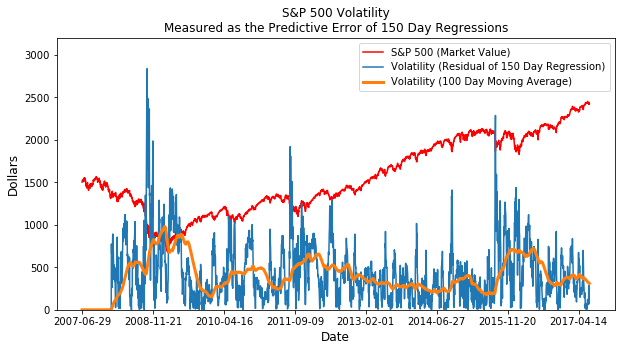

In [1024]:
def cleanToPandas(filePath):

    cleaned = pd.read_csv(filePath, index_col=None, na_values=['.'])

    cleaned = cleaned.fillna(method='ffill')

    return cleaned





def formatForRegression(df):

    x = df.index.values

    x = np.matrix(x).T

    y = df['SP500'].values

    y = np.matrix(y).T

    return x, y





def volatilityByDay(df, depth):

    x, y = formatForRegression(df)

    regr = lin.LinearRegression()

    values = np.zeros(len(y))



    for i in range(depth+1, len(y)):

        regr.fit(x[i - depth:i], y[i - depth:i])

        m = regr.coef_[0]

        b = regr.intercept_

        est = m * i + b

        error = abs(est - y[i])

        values[i] = error.item(0) * 10



    return values





def rollingAverage(data, depth):

    rolling = pd.rolling_mean(pd.DataFrame(data), depth)

    rolling = rolling.fillna(0)

    rolling = rolling[0].values

    return rolling





def plotAll(original, volt, voltAv):

    x, y = formatForRegression(original)

    plt.figure(figsize=(10, 5))

    plt.plot(x, y, color='r', label='S&P 500 (Market Value)')

    plt.plot(x, volt, label='Volatility (Residual of 150 Day Regression)')

    plt.plot(x, voltAv, linewidth=3.0, label='Volatility (100 Day Moving Average)')

    plt.xticks(x[::365], original['DATE'][::365])

    plt.title('S&P 500 Volatility\nMeasured as the Predictive Error of 150 Day Regressions')

    plt.xlabel('Date', fontsize=12)

    plt.ylabel('Dollars', fontsize=12)

    plt.legend(loc='upper right')

    plt.ylim([0, 3200])

    plt.show()





sp = cleanToPandas('SP500.csv')

volatility = volatilityByDay(sp, 150)

volatilityAverage = rollingAverage(volatility, 100)



plotAll(sp, volatility, volatilityAverage)

In [1025]:
vol = volatilityAverage

In [1026]:
sp.index = sp.DATE

In [1027]:
del(sp['DATE'])

In [1028]:
sp['vol'] = vol

In [1029]:
sp

,SP500,vol
DATE,,
2007-06-29,1503.35,0.000000
2007-07-02,1519.43,0.000000
2007-07-03,1524.87,0.000000
2007-07-04,1524.87,0.000000
2007-07-05,1525.40,0.000000
2007-07-06,1530.44,0.000000
2007-07-09,1531.85,0.000000
2007-07-10,1510.12,0.000000
2007-07-11,1518.76,0.000000


In [1030]:
data = pd.merge(data, sp, left_index=True, right_index=True)

In [1031]:
del(data['SP500'])

In [1032]:
vol = data['vol']

In [1033]:
del(data['vol'])

In [1034]:
data

,oil,fed,tre,loa,spr
DATE,,,,,
2012-07-09,85.93,0.17,1.53,3.25,2.71
2012-07-10,83.92,0.17,1.53,3.25,2.70
2012-07-11,85.88,0.17,1.54,3.25,2.69
2012-07-12,86.02,0.18,1.50,3.25,2.69
2012-07-13,87.15,0.19,1.52,3.25,2.67
2012-07-16,88.41,0.18,1.50,3.25,2.65
2012-07-17,89.07,0.17,1.53,3.25,2.63
2012-07-18,89.88,0.16,1.52,3.25,2.61
2012-07-19,92.78,0.13,1.54,3.25,2.59


In [1035]:
ridgereg = lin.Ridge(alpha=0.1, normalize=True, random_state=0)

In [1036]:
ridgereg.fit(data[:600], vol[30:630])

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=0, solver='auto', tol=0.001)

In [1037]:
pred = ridgereg.predict(data[600:1100])

In [1038]:
plt.plot(data.index[600:1100], (pred - pred.mean())/np.std(pred), color='r')
plt.plot(data.index[600:1100], (vol[630:1130] - vol[630:1130].mean())/np.std(vol[630:1130]), color='g')

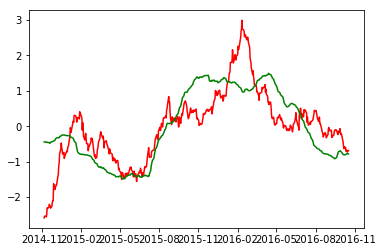

In [1039]:
plt.show()